# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-10-10 10:00:04.030752


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 10/9/20


,10/9/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,7663293,213752,2.79
Brazil,5055888,149639,2.96
India,6979423,107416,1.54
Mexico,810020,83497,10.31
United Kingdom,578390,42769,7.39
Italy,343770,36111,10.50
Peru,838614,33098,3.95


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 10/9/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
45323,US,7549682,2020-10-07,211801.0,915.0,50341.0,45234.285714
45322,US,7499341,2020-10-06,210886.0,705.0,41939.0,43957.714286
45321,US,7457402,2020-10-05,210181.0,460.0,39557.0,43980.714286
45320,US,7417845,2020-10-04,209721.0,337.0,35504.0,43088.571429
45319,US,7382341,2020-10-03,209384.0,687.0,50044.0,43219.714286
45318,US,7332297,2020-10-02,208697.0,907.0,54506.0,42480.857143
45317,US,7277791,2020-10-01,207790.0,858.0,44749.0,41920.714286


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 10/9/20


,10/9/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,471696,33290.0,7.06
Texas,812191,16871.0,2.08
California,849076,16486.0,1.94
New Jersey,212013,16164.0,7.62
Florida,728921,15186.0,2.08
Massachusetts,137701,9577.0,6.95
Illinois,316546,9191.0,2.90


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 10/9/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1569,California,841928,2020-10-07,16338.0,94.0,3726.0,3259.000000
1568,California,838202,2020-10-06,16244.0,73.0,2695.0,3221.142857
1567,California,835507,2020-10-05,16171.0,24.0,2794.0,3256.571429
1566,California,832713,2020-10-04,16147.0,32.0,3192.0,3260.428571
1565,California,829521,2020-10-03,16115.0,61.0,3508.0,3152.857143
1564,California,826013,2020-10-02,16054.0,81.0,3808.0,3193.285714
1563,California,822205,2020-10-01,15973.0,88.0,3090.0,3241.285714


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 10/9/20


,10/9/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,279909,6741.0,2.41
Orange,55345,1316.0,2.38
Riverside,61824,1256.0,2.03
San Bernardino,57517,984.0,1.71
San Diego,49823,821.0,1.65
San Joaquin,20828,473.0,2.27
Sacramento,23523,447.0,1.90


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 10/9/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
4975,Los Angeles,277445,2020-10-07,6709.0,28.0,1589.0,1020.857143
4974,Los Angeles,275856,2020-10-06,6681.0,27.0,914.0,938.857143
4973,Los Angeles,274942,2020-10-05,6654.0,7.0,377.0,926.714286
4972,Los Angeles,274565,2020-10-04,6647.0,5.0,927.0,966.285714
4971,Los Angeles,273638,2020-10-03,6642.0,16.0,985.0,950.000000
4970,Los Angeles,272653,2020-10-02,6626.0,16.0,1282.0,982.571429
4969,Los Angeles,271371,2020-10-01,6610.0,34.0,1072.0,993.857143
4968,Los Angeles,270299,2020-09-30,6576.0,25.0,1015.0,995.142857
4967,Los Angeles,269284,2020-09-29,6551.0,36.0,829.0,1021.571429
4966,Los Angeles,268455,2020-09-28,6515.0,1.0,654.0,1001.285714



7 day new US cases as of 10/9/20


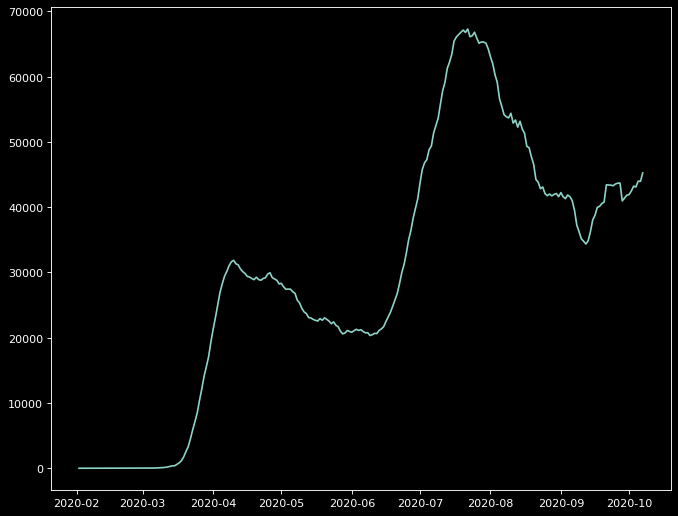

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 10/9/20


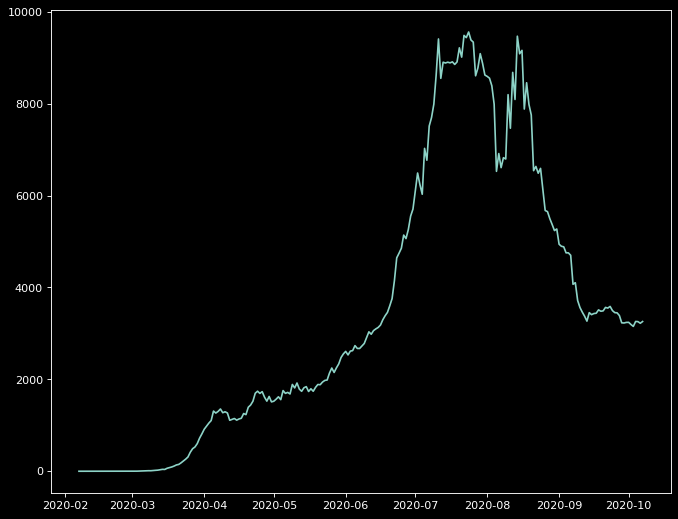

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 10/9/20


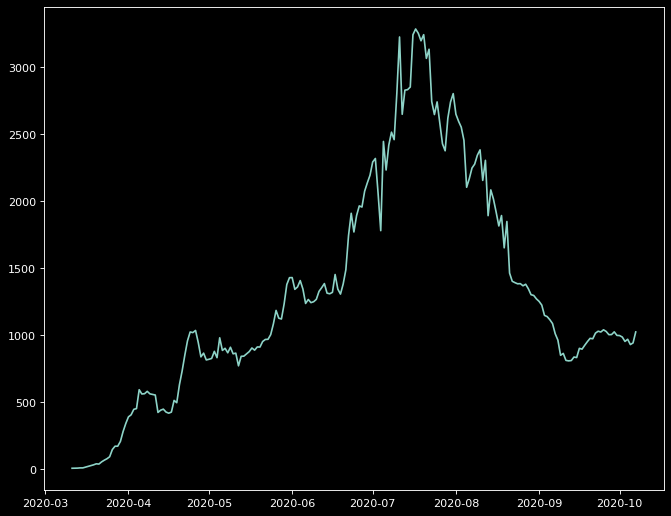

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()